In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the dataset
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Exploratory Data Analysis

As always, the first thing we're going to do is explore our dataset. We have customer data where each row represents a unique customer. In addition, we have a class status, with values 1 if the customer has default, and 0 if not. However, we don't always have these labels, and sometimes we need to create them from scratch based on our prior business knowledge. 

In [4]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
def plot_continuous(dataset, var_name):
    plt.figure(figsize = (4, 2))
    sns.displot(dataset[var_name])
    plt.axvline(dataset[var_name].mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(dataset[var_name].median(), color='r', linewidth=1)
    plt.title(f'Distribution of variable "{var_name}"')

In [6]:
def plot_boxplot(var_name, dataset = data):
    plt.figure(figsize = (8, 6))
    sns.boxplot(data = dataset, x = "Class", y = var_name)
    plt.title(f'Distribution of variable "{var_name}"')

In [7]:
def plot_objects(dataset, var_name):
    sns.countplot(dataset[var_name])
    plt.title(f'Distribution of variable "{var_name}"')

The major problem with our data is that we have an unbalanced target. As we can see in the graph below, our dataset has more non default customers than default ones. Later we will see some techniques that will help us solve this problem.

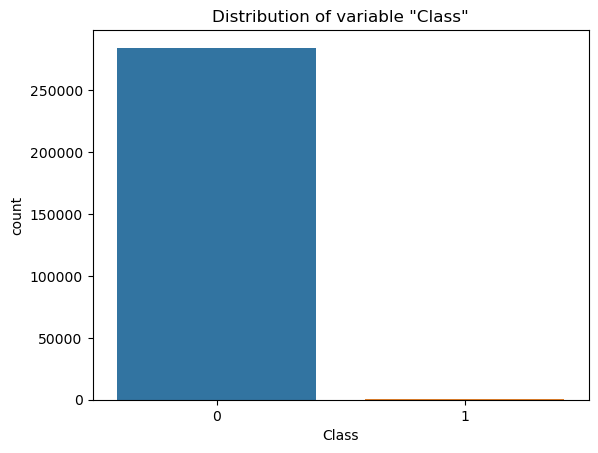

In [8]:
plot_objects(data, 'Class')

<Figure size 400x200 with 0 Axes>

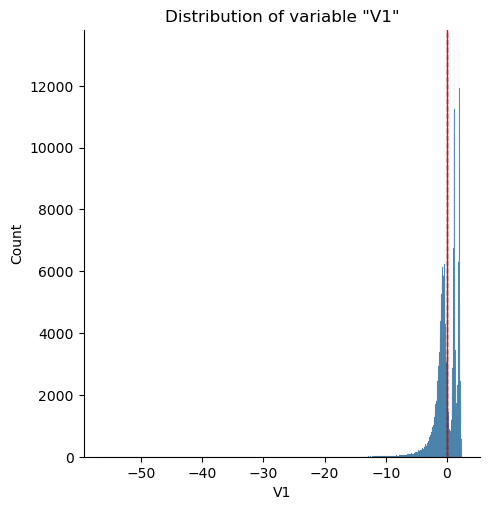

In [9]:
plot_continuous(data, 'V1')

<Figure size 400x200 with 0 Axes>

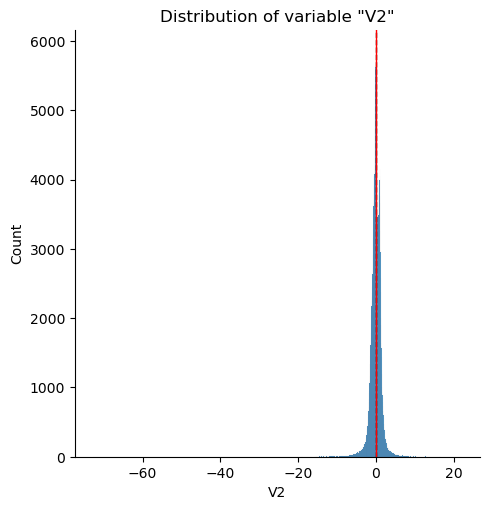

In [10]:
plot_continuous(data, 'V2')

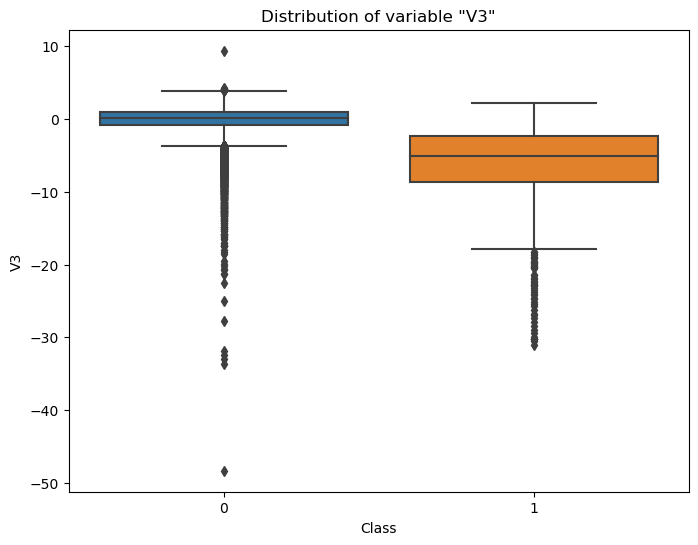

In [11]:
plot_boxplot("V3")

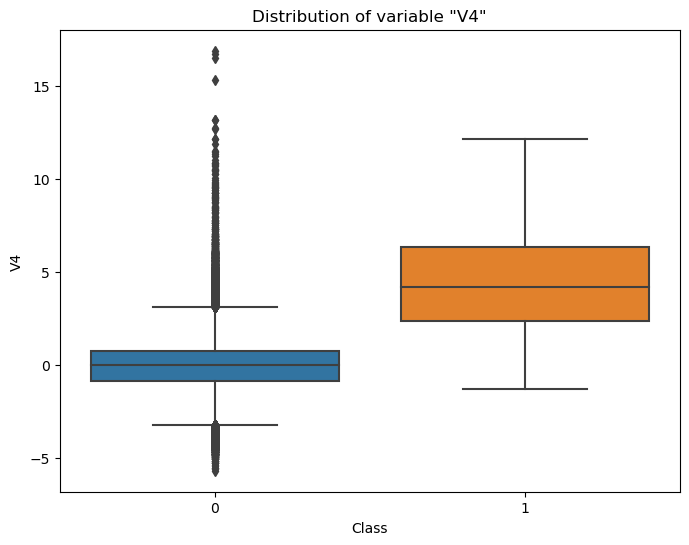

In [12]:
plot_boxplot("V4")

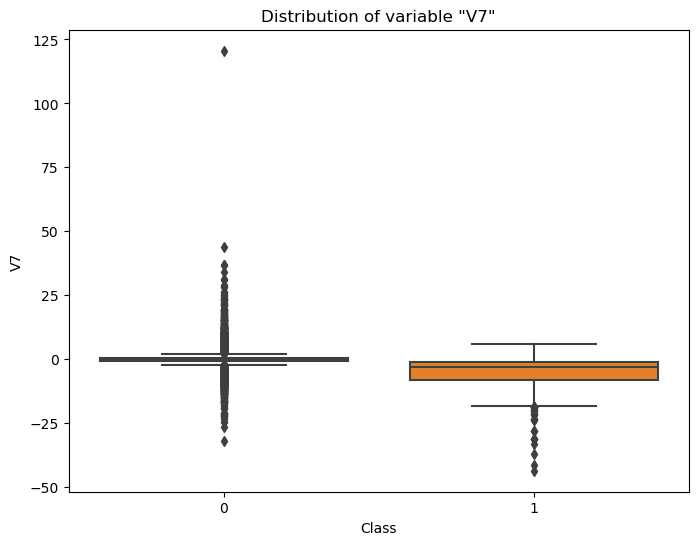

In [13]:
plot_boxplot("V7")

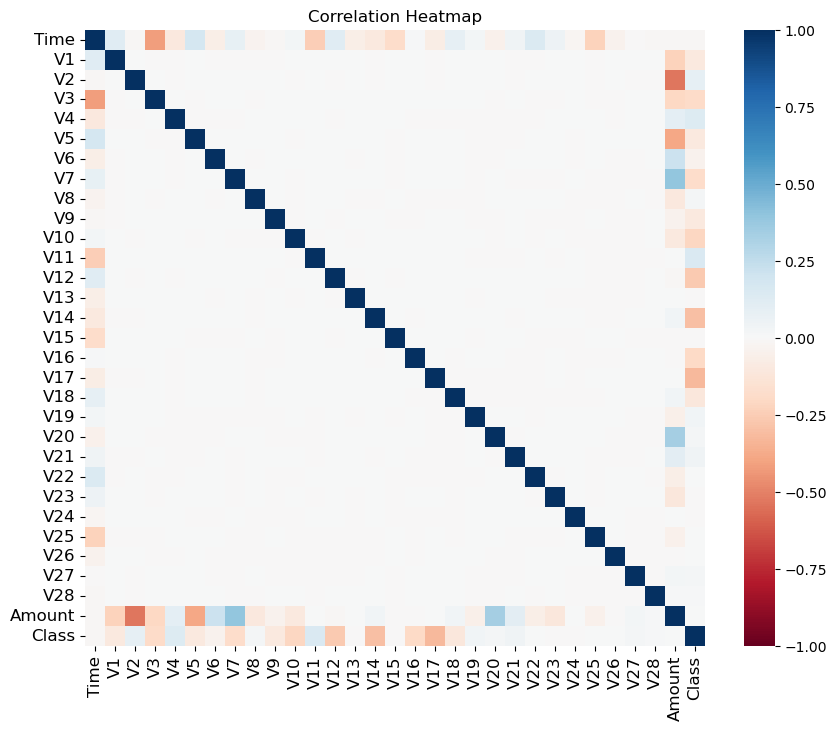

In [16]:
plt.figure(figsize = (10, 8))
s = sns.heatmap(data.corr(),
               annot = False, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)

s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing and Modeling

In [17]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

As mentioned earlier, we have unbalanced data, which means that single-label observations dominate. The modeling result may be either too good to be believed or we may get incorrectly generalized model. So what can be done? There are several techniques that we can try on and compare the results.

### Version 1: without balancing

In [18]:
target = data['Class'].astype(int)
X = data.drop(columns='Class')
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [19]:
train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)
print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 213605
 Test set: 71202


In [20]:
Logistic = LogisticRegression(random_state=42)

In [21]:
indx = [ 'Acc_train', 'Acc_test', "Recall_train", 'Recall_test', "Precision_train", 'Precision_test']

In [22]:
results = pd.DataFrame(index=indx, columns=['Logistic'])

In [23]:
Logistic.fit(train_x,train_y)
test_y_new = Logistic.predict(test_x)    
train_y_new = Logistic.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_train = recall_score(train_y, train_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_train = precision_score(train_y, train_y_new)
pr_test = precision_score(test_y,test_y_new)
name = results.columns[0]
results[name] = [acc_train, acc_test, rec_train, rec_test, pr_train, pr_test]

In [24]:
results

,Logistic
Acc_train,0.999087
Acc_test,0.998947
Recall_train,0.686016
Recall_test,0.601770
Precision_train,0.773810
Precision_test,0.693878


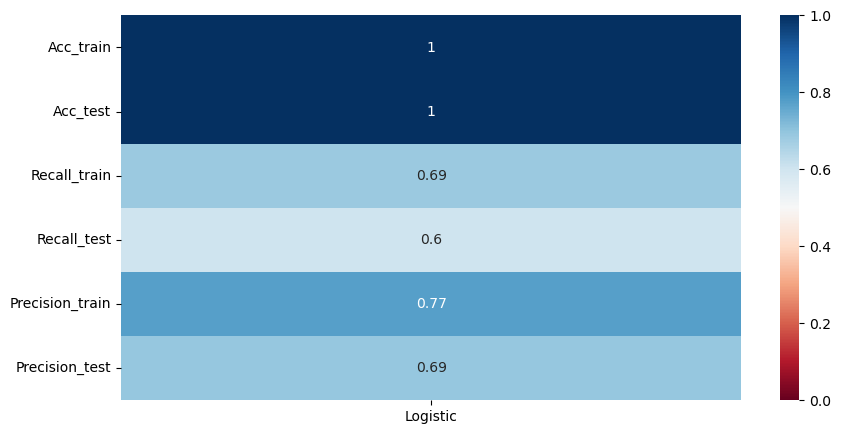

In [25]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(results,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

### Version 2: Down-sample Majority Class

In [26]:
majority = data[data.Class==0]
minority = data[data.Class==1]
 

downsampled = resample(majority, 
                       replace=False,    
                       n_samples=483,     
                       random_state=42) 
 

downsampled = pd.concat([downsampled, minority])
 
downsampled['Class'].value_counts()

1    492
0    483
Name: Class, dtype: int64

In [27]:
target = downsampled['Class'].astype(int)
X = downsampled.drop(columns='Class')
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.058040,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,-0.081298,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,0.065716,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,-0.169706,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,-0.282777,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00


In [28]:
train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)
print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 731
 Test set: 244


In [29]:
Logistic = LogisticRegression(random_state=42)

In [30]:
indx = [ 'Acc_train', 'Acc_test', "Recall_train", 'Recall_test', "Precision_train", 'Precision_test']

In [31]:
results = pd.DataFrame(index=indx, columns=['Logistic'])

In [32]:
Logistic.fit(train_x,train_y)
test_y_new = Logistic.predict(test_x)    
train_y_new = Logistic.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_train = recall_score(train_y, train_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_train = precision_score(train_y, train_y_new)
pr_test = precision_score(test_y,test_y_new)
name = results.columns[0]
results[name] = [acc_train, acc_test, rec_train, rec_test, pr_train, pr_test]

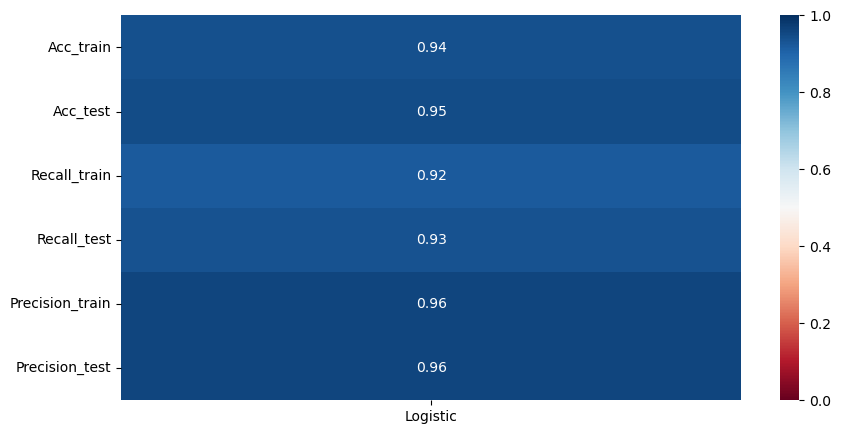

In [33]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(results,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

As a result, we solved the problem of overfitting, because the accuracy of the test and training samples does not differ too much, moreover, the recall and precision are closer to each other. However, we now have a generalization problem! 


### Version 3: Up-sample Minority Class

We are moving to next technique: upsampling the minority class. This time we will resample the minority class so that it equals the majority. **Think about the problem this method might cause?**

In [34]:
upsampled = resample(minority, 
                     replace=True,     
                     n_samples=28500,    
                     random_state=42) 
 

upsampled = pd.concat([majority,upsampled])

upsampled['Class'].value_counts()

0    284315
1     28500
Name: Class, dtype: int64

In [35]:
target = upsampled['Class'].astype(int)
X = upsampled.drop(columns='Class')
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [36]:
train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 234611
 Test set: 78204


In [37]:
Logistic = LogisticRegression(random_state=42)

In [38]:
indx = [ 'Acc_train', 'Acc_test', "Recall_train", 'Recall_test', "Precision_train", 'Precision_test']

In [39]:
results = pd.DataFrame(index=indx, columns=['Logistic'])

In [40]:
Logistic.fit(train_x,train_y)
test_y_new = Logistic.predict(test_x)    
train_y_new = Logistic.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_train = recall_score(train_y, train_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_train = precision_score(train_y, train_y_new)
pr_test = precision_score(test_y,test_y_new)
name = results.columns[0]
results[name] = [acc_train, acc_test, rec_train, rec_test, pr_train, pr_test]

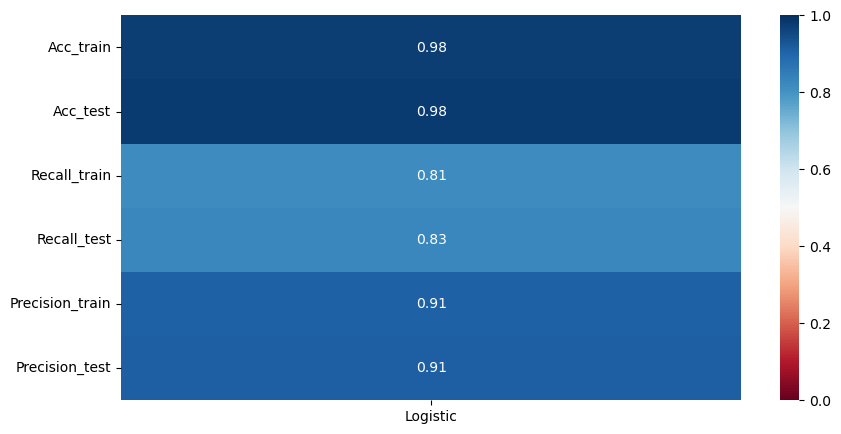

In [41]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(results,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

### Version 4: Upsample Minority Only On Train Set

Last but not least, in the last experiment, we will first split the data into train and test samples,then upsample data. Let's try it out!

In [42]:
target = data['Class'].astype(int)
X = data.drop(columns='Class')

train_x,test_x,train_y,test_y = train_test_split(X,target,test_size=0.25,random_state=42)

print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 213605
 Test set: 71202


In [43]:
train = pd.concat([train_x, train_y],  axis = 1)
majority = train[train.Class==0]
minority = train[train.Class==1]
majority.shape

(213226, 31)

In [44]:
upsampled2 = resample(minority, 
                     replace=True,     
                     n_samples=2141,    
                     random_state=42) 
 

upsampled2 = pd.concat([majority,upsampled2])

upsampled2['Class'].value_counts()

0    213226
1      2141
Name: Class, dtype: int64

In [45]:
train_y = upsampled2['Class'].astype(int)
train_x = upsampled2.drop(columns='Class')

print(f"Number of observations \n Train set: {len(train_x)}\n Test set: {len(test_x)}")

Number of observations 
 Train set: 215367
 Test set: 71202


In [46]:
Logistic = LogisticRegression(random_state=42)
indx = [ 'Acc_train', 'Acc_test', "Recall_train", 'Recall_test', "Precision_train", 'Precision_test']

In [47]:
results = pd.DataFrame(index=indx, columns=['Logistic'])

In [48]:
Logistic.fit(train_x,train_y)
test_y_new = Logistic.predict(test_x)    
train_y_new = Logistic.predict(train_x)
acc_train = accuracy_score(train_y,train_y_new)
acc_test = accuracy_score(test_y,test_y_new)
rec_train = recall_score(train_y, train_y_new)
rec_test = recall_score(test_y,test_y_new)
pr_train = precision_score(train_y, train_y_new)
pr_test = precision_score(test_y,test_y_new)
name = results.columns[0]
results[name] = [acc_train, acc_test, rec_train, rec_test, pr_train, pr_test]

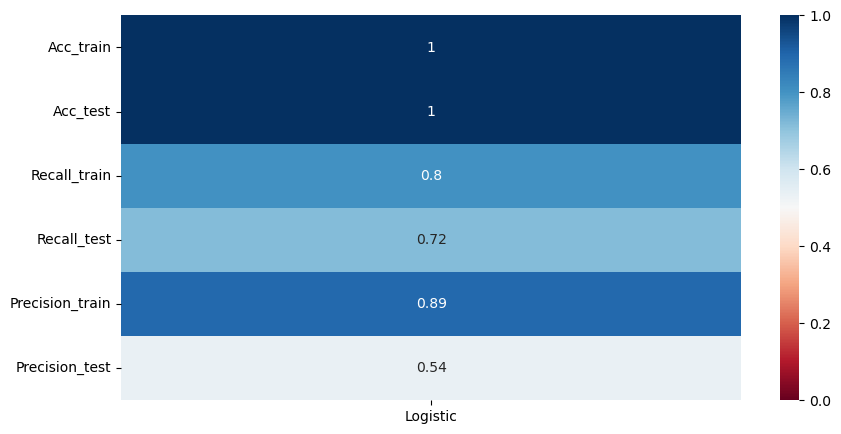

In [49]:
plt.figure(figsize = (10, 5))
s = sns.heatmap(results,
               annot = True, 
               cmap = 'RdBu',
               vmin = 0, 
               vmax = 1)

This looks like what we want! Logistic regression has a high rate of recall, but lower precision, we cannot consider this as our final model. 

What's next? 
- Try another model and compare the results.
- Fine-tune the models we already have.
- Create meaningful new features.